# This notebook is responsible for annotating previously downloaded data using pre-trained YOLOv8 model.

## Defining Paths

In [1]:
from pathlib import Path
import os

# Path of the project
PROJECT_PATH = Path(os.getcwd()).resolve().parent

# Main data dir
DATA_PATH = PROJECT_PATH / 'data'

# Paths to train, valid and test dir
TRAIN_PATH = DATA_PATH / 'train'
TRAIN_IMAGES_PATH = TRAIN_PATH / 'images'

VALID_PATH = DATA_PATH / 'valid'
VALID_IMAGES_PATH = VALID_PATH / 'images'

TEST_PATH = DATA_PATH / 'test'
TEST_IMAGES_PATH = TEST_PATH / 'images'

# Loading pre-trained model

In [3]:
from inference import get_model
from dotenv import load_dotenv

dotenv_path = PROJECT_PATH / '.env'
load_dotenv(dotenv_path)

ROBOLOW_API_KEY = os.getenv('ROBOFLOW_API_KEY')            # Roboflow API Key
ROBOFLOW_MODEL_ID = 'football-players-detection-3zvbc/11'  # Pre-trained model

model = get_model(api_key=ROBOLOW_API_KEY, model_id=ROBOFLOW_MODEL_ID)

## Model's output

In [4]:
import supervision as sv
import cv2
import os

img_path = TEST_IMAGES_PATH / os.listdir(TEST_IMAGES_PATH)[0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

output = model.infer(img, confidence=0.3)[0]
detections = sv.Detections.from_inference(output)

print("Model's output")
print(output.predictions)
print('----------------------------------')
print('Detections object')
print(detections)

Model's output
[ObjectDetectionPrediction(x=691.5, y=357.5, width=43.0, height=67.0, confidence=0.9250348210334778, class_name='player', class_confidence=None, class_id=2, tracker_id=None, detection_id='4eb51db0-7f95-4111-a5c9-6ef66b84baf9', parent_id=None), ObjectDetectionPrediction(x=514.0, y=624.0, width=42.0, height=94.0, confidence=0.9244215488433838, class_name='player', class_confidence=None, class_id=2, tracker_id=None, detection_id='b619bf17-2cbd-4553-8c3c-ce0ff32162cd', parent_id=None), ObjectDetectionPrediction(x=1729.0, y=559.5, width=44.0, height=95.0, confidence=0.9243432283401489, class_name='player', class_confidence=None, class_id=2, tracker_id=None, detection_id='2a6114b0-ec37-4d16-b5ae-ed53bdad9b4c', parent_id=None), ObjectDetectionPrediction(x=694.0, y=426.0, width=44.0, height=70.0, confidence=0.9235303401947021, class_name='player', class_confidence=None, class_id=2, tracker_id=None, detection_id='6b973f10-4335-44b7-9e58-0d32e6f00025', parent_id=None), ObjectDetec

## Test model on few samples

In [5]:
import numpy as np

test_imgs = os.listdir(TEST_IMAGES_PATH)
test_imgs


['08fd33_0_125.jpg',
 '08fd33_0_86.jpg',
 '0bfacc_0_124.jpg',
 '08fd33_0_108.jpg',
 '4b770a_1_6_png.rf.6f234c633e0a3043221edc3ff8c6f009.jpg',
 '121364_0_114.jpg',
 '0bfacc_0_93.jpg',
 '573e61_0_144.jpg',
 '798b45_7_8_png.rf.e4c50eab9137ae74d5e12358e12c2a1f.jpg',
 '0bfacc_0_89.jpg',
 '4b770a_9_3_png.rf.c30f2e4c0123f29768df80e85401e82a.jpg',
 '0bfacc_0_2.jpg',
 '2e57b9_0_5.jpg',
 '08fd33_0_136.jpg',
 '4b770a_3_6_png.rf.4ed4b212a97df056c9ff419420583e92.jpg',
 '42ba34_5_5_png.rf.a9b632814f49d7689f3bab46a8dabe8f.jpg',
 '2e57b9_0_88.jpg',
 '121364_0_126.jpg',
 '08fd33_0_4.jpg',
 '573e61_0_82.jpg',
 '40cd38_7_6_png.rf.a7c59ca16d22dbd42bda57bd9323ddaa.jpg',
 '2e57b9_0_147.jpg',
 '08fd33_0_81.jpg',
 '121364_0_93.jpg',
 '573e61_9_6_png.rf.4bcd4b0f83933a9a0dd63a5e0086c953.jpg',
 '0bfacc_0_32.jpg',
 '2e57b9_0_98.jpg',
 '573e61_0_138.jpg',
 '4b770a_1_8_png.rf.f3c662c354591b291b797d41e04be5ef.jpg',
 '573e61_0_88.jpg',
 '573e61_0_3.jpg',
 '08fd33_0_98.jpg',
 '42ba34_1_5_png.rf.bcbb8ce9999df12003f0562

### Creating Annotator Objects

In [6]:
# Define annotator objects for visualization
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

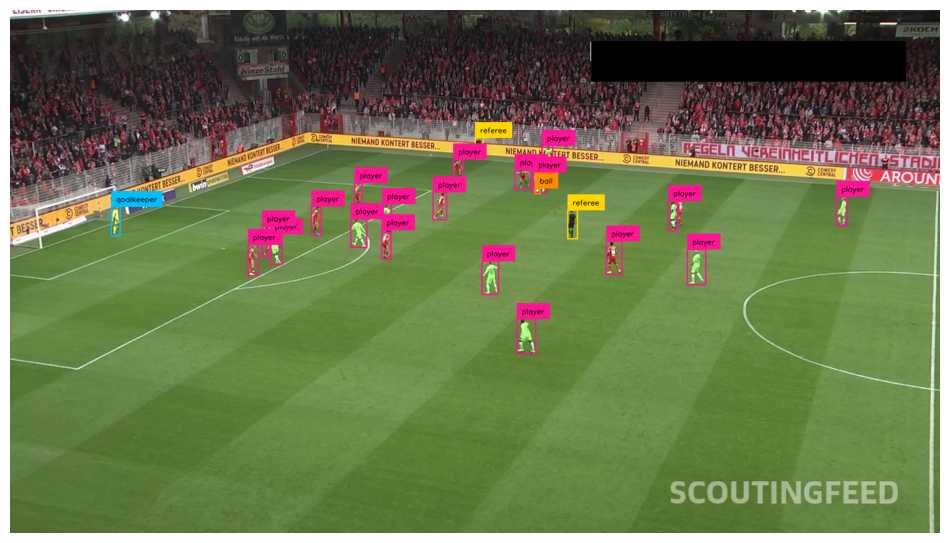

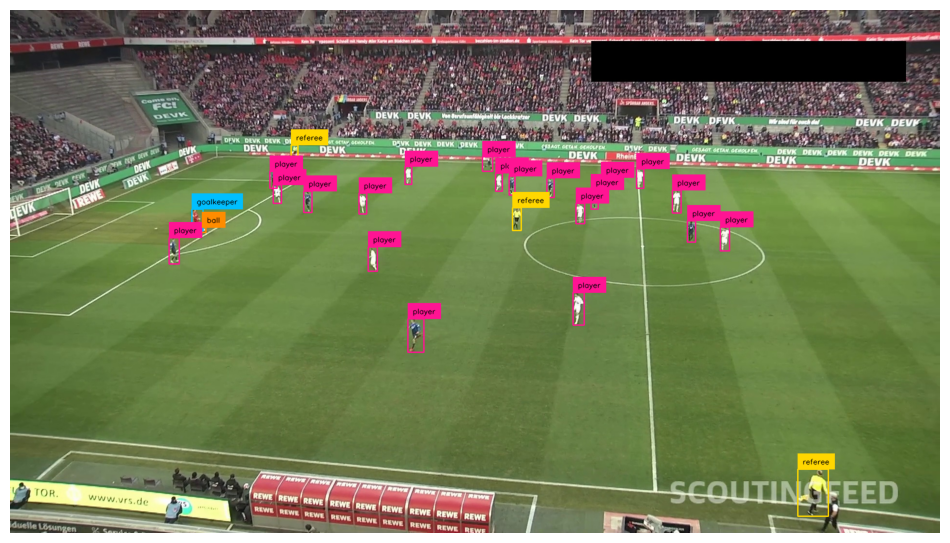

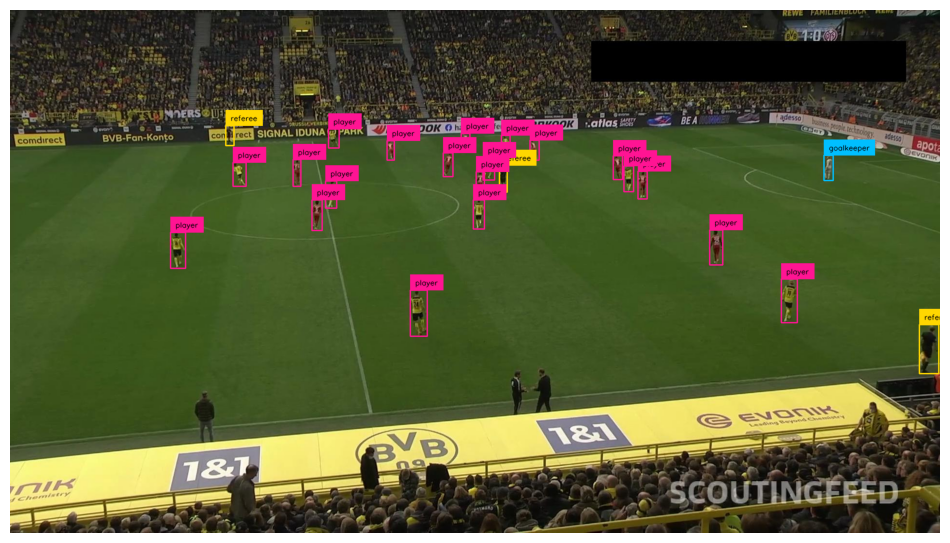

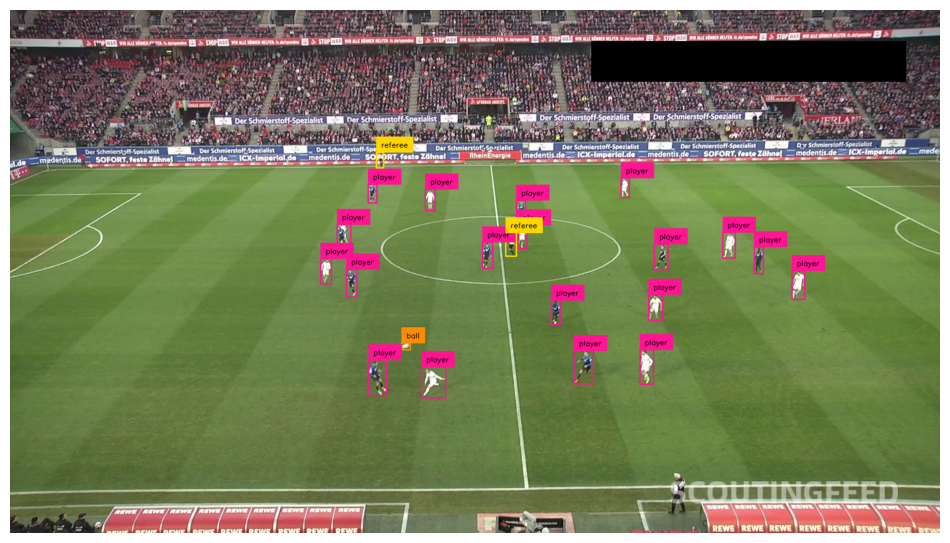

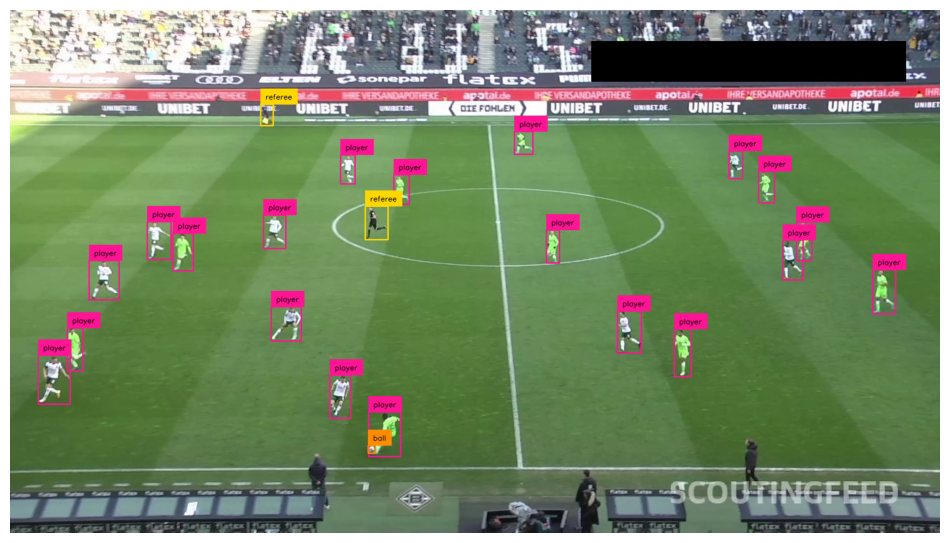

In [14]:
for img_name in np.random.choice(test_imgs, 5):
    img_path = TEST_IMAGES_PATH / img_name
    img = cv2.imread(img_path)
    # infer method converts BGR to RGB format
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    output = model.infer(img, confidence=0.3)[0]
    detections = sv.Detections.from_inference(output)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    
    annotated_img = img.copy()
    annotated_img = box_annotator.annotate(
        scene=annotated_img,
        detections=detections
    )
    annotated_img = label_annotator.annotate(
        scene=annotated_img,
        detections=detections
    )

    sv.plot_image(annotated_img)

## Annotating each image and saving annotations in JSON format

### Creating annotation dir for each set

In [15]:
TRAIN_ANNOTATIONS = TRAIN_PATH / 'coco_annotations'
VALID_ANNOTATIONS = VALID_PATH / 'coco_annotations'
TEST_ANNOTATIONS = TEST_PATH / 'coco_annotations'

TRAIN_ANNOTATIONS.mkdir(parents=True, exist_ok=True)
VALID_ANNOTATIONS.mkdir(parents=True, exist_ok=True)
TEST_ANNOTATIONS.mkdir(parents=True, exist_ok=True)

The Detections from_inferenece() method returns predictions in pascal voc format
(x_min, y_min, x_max, y_max) in pixels,
but transformer-based models (like DETR, Deformable DETR, DINO, Swin, etc.) require COCO format, i.e.
(x_min, y_min, width, height).

In [17]:
from dataclasses import dataclass
from math import ceil
from tqdm import tqdm
import json

@dataclass
class AnnotationModel:
    model_id: str
    roboflow_api_key: str

    def __post_init__(self):
        self.model = get_model(self.model_id, self.roboflow_api_key)

    def _process_batch(self, batch_outputs, iou_threshold: float | None=None) -> list[sv.Detections]:
        list_detections: list[sv.Detections] = []
        for outputs in batch_outputs:
            detections = sv.Detections.from_inference(outputs)
            
            if iou_threshold is not None:
                detections = detections.with_nms(threshold=iou_threshold, class_agnostic=True)

            list_detections.append(detections)
        
        return list_detections

    def _create_batch(self, file_names: list[str], batch_size: int=4):
        current_batch: list[str] = []
        for file_name in file_names:
            if len(current_batch) == batch_size:
                yield current_batch
                current_batch: list[str] = [] 
            current_batch.append(file_name)

        if current_batch:
            yield current_batch

    def pascal_voc2coco(self, boxes: np.ndarray, image_height: int, image_width: int):
        # Unpack columns
        x_min, y_min, x_max, y_max = boxes.T

        # Convert to width and height
        width = x_max - x_min
        height = y_max - y_min

        # Clip coordinates to stay within image
        x_min = np.clip(x_min, 0, image_width)
        y_min = np.clip(y_min, 0, image_height)
        width = np.clip(width, 0, image_width - x_min)
        height = np.clip(height, 0, image_height - y_min)

        return np.stack(
            [x_min, y_min, width, height],
            axis=1
        )

    def infer(self, X: list[np.array], conf_threshold: float, iou_threshold: float | None=None) -> list[sv.Detections]:
        batch_outputs = self.model.infer(X, confidence=conf_threshold)
        batch_outputs = self._process_batch(batch_outputs, iou_threshold)
        return batch_outputs

    def annotate_dataset(self, input_folder: Path, output_json: Path, batch_size: int=4, conf_threshold: float=0.3, iou_threshold: float | None=None):
        img_file_names = os.listdir(input_folder)
        coco_output = {
            'images': [],
            'annotations': [],
            'categories': []
        }

        class_names = self.model.class_names
        for idx, cls_name in enumerate(class_names):
            coco_output['categories'].append({'id': idx, 'name': cls_name})

        ann_id = 1
        img_id = 1
        for batch_filenames in tqdm(self._create_batch(img_file_names, batch_size=batch_size), 
                                               total=ceil(len(img_file_names) / batch_size), 
                                               desc=f'Annotating images in {input_folder} | Total: {len(img_file_names)} | Batch size: {batch_size}'):
            batch_images     = [cv2.imread(str(input_folder / f)) for f in batch_filenames]
            batch_detections = self.infer(batch_images, conf_threshold, iou_threshold) 

            for filename, img, detections in zip(batch_filenames, batch_images, batch_detections):
                h, w = img.shape[:2]
                coco_output['images'].append({'id': img_id, 'file_name': filename, 'width': w, 'height': h})

                coco_boxes = self.pascal_voc2coco(detections.xyxy, h, w)
                cls_ids    = detections.class_id
                conf       = detections.confidence
                for box, cls_id, conf in zip(coco_boxes, cls_ids, conf):
                    coco_output['annotations'].append(
                        {
                            'id': ann_id,
                            'image_id': img_id,
                            'category_id': int(cls_id),
                            'bbox': [float(v) for v in box],
                            'area': float(box[2] * box[3]),
                            'iscrowd': 0,
                            'confidence': float(conf)
                        }
                    )
                    ann_id += 1
                
                img_id += 1
        
        self.save_coco(coco_output, output_json)

    def save_coco(self, coco_output: dict, output_json: Path):
        with open(output_json / 'annotations.json', 'w') as f:
            json.dump(coco_output, f, indent=4)

        print(f'Saved annotations to: {output_json}')

In [19]:
DATASET_PATHS = [
    TRAIN_IMAGES_PATH,
    VALID_IMAGES_PATH,
    TEST_IMAGES_PATH
]
COCO_ANNOTATION_PATHS = [
    TRAIN_ANNOTATIONS,
    VALID_ANNOTATIONS,
    TEST_ANNOTATIONS
]
ANNOTATION_MODEL = AnnotationModel(
    model_id=ROBOFLOW_MODEL_ID,
    roboflow_api_key=ROBOLOW_API_KEY
)

BATCH_SIZE = 4
CONF_THRESHOLD = 0.3
IOU_THRESHOLD = 0.5
for dataset_path, annotation_path in zip(DATASET_PATHS, COCO_ANNOTATION_PATHS):
    ANNOTATION_MODEL.annotate_dataset(
        input_folder=dataset_path,
        output_json=annotation_path,
        batch_size=BATCH_SIZE,
        conf_threshold=CONF_THRESHOLD,
        iou_threshold=IOU_THRESHOLD
    )


Annotating images in /home/mikolaj/Desktop/Projects/my_projects/football-ai/data/train/images | Total: 905 | Batch size: 4: 100%|██████████| 227/227 [03:08<00:00,  1.20it/s]


Saved annotations to: /home/mikolaj/Desktop/Projects/my_projects/football-ai/data/train/coco_annotations


Annotating images in /home/mikolaj/Desktop/Projects/my_projects/football-ai/data/valid/images | Total: 124 | Batch size: 4: 100%|██████████| 31/31 [00:25<00:00,  1.21it/s]


Saved annotations to: /home/mikolaj/Desktop/Projects/my_projects/football-ai/data/valid/coco_annotations


Annotating images in /home/mikolaj/Desktop/Projects/my_projects/football-ai/data/test/images | Total: 93 | Batch size: 4: 100%|██████████| 24/24 [00:19<00:00,  1.24it/s]

Saved annotations to: /home/mikolaj/Desktop/Projects/my_projects/football-ai/data/test/coco_annotations
